In [1]:
from tunable_agents import utility, agent
import utils
import gin
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tunable_agents.environments.gathering_env import gathering_env
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

%matplotlib inline
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
#gpus = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
configs_dir = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/tunable-agents-MORL/configs/"

gin_files = [configs_dir + "envs/replication_env.gin", configs_dir + "qnets/128_128_64_model.gin"]
gin_files = [configs_dir + "envs/cumulative_rewards_env.gin", configs_dir + "qnets/128_128_64_model.gin"]
gin_files = [configs_dir + "envs/fixed_env.gin", configs_dir + "qnets/128_128_64_model.gin"]
gin_bindings = []
utility.load_gin_configs(gin_files, gin_bindings)

ERROR:root:Path not found: envs/replication_env.gin
ERROR:root:Path not found: qnets/64_64_model.gin


In [68]:
root_path = "C:/Users/maler/Google Drive/Personale/Università/Master/Tesi/Code/experiments_results/"
experiment = "64_64_model-replication_env-replication-1"
results_file_path = "./results/" + experiment + ".npy"

experiment_dir = os.path.join(root_path, experiment)
model_dir = os.path.join(experiment_dir, 'model')
model_path = os.path.join(model_dir, 'dqn_model.h5')


env = utility.create_environment()
tf_agent = agent.DQNAgent(epsilon=0, obs_spec=env.observation_spec())

tf_agent.load_model(model_path)
time_step = env.reset()


In [77]:
action = tf_agent.greedy_policy(time_step.observation)
time_step = env.step(action)

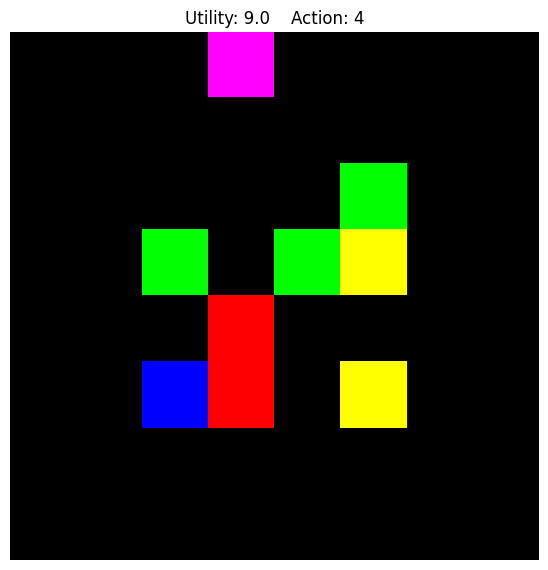

In [79]:
plt.figure(figsize=(15,7), dpi=100)
image = time_step.observation['state_obs'][:, :, 6:]
plt.imshow(image)
plt.title('Utility: {}    Action: {}'.format(time_step.reward, action))
plt.axis('off')
plt.show()

if time_step.is_last():
    print('END EPISODE')

In [78]:
print(env._utility_func.agent_utility_repr)
print(env._cumulative_rewards)

[-0.25   0.25  -0.375 -0.5  ]
[4. 0. 0. 1. 0. 0.]
